# 모두를 위한 딥러닝 시즌2
##  Lab 07-1 training test dataset  learning rate normalization

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.compat.v1.enable_eager_execution()

print(tf.__version__)
from IPython.display import Image

1.14.0


## Overshooting

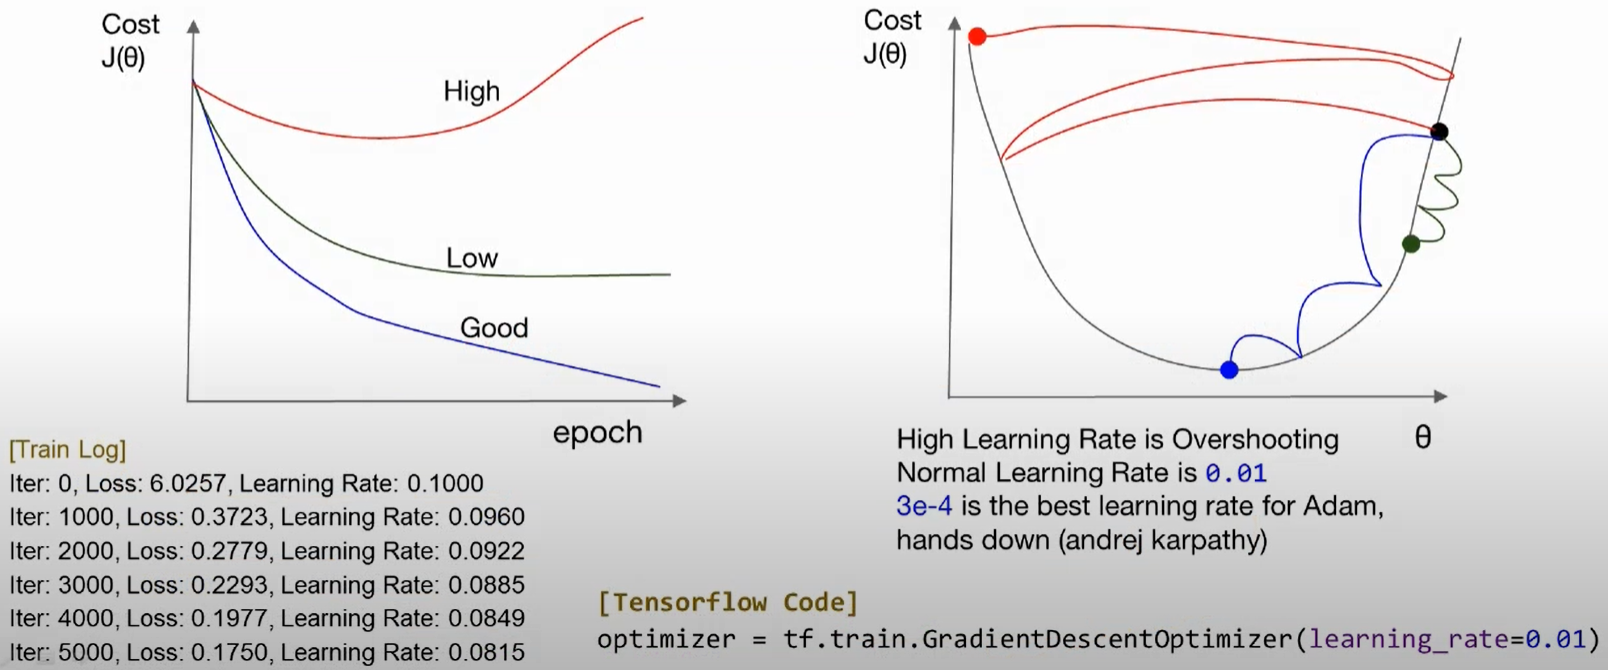

In [2]:
Image("Lab-07/1.png")

learning rate $\alpha$는 gradient discent를 하는 과정에서 hyper-parameter로 모델을 만들어가기 위한 설정 값으로,
$$
Repeat \quad \theta_{j} := \theta_{j}-\alpha\frac{\partial}{\partial\theta_j}J(\theta) $$
이다.

이때 learning rate 값을 정하는 것이 중요하다. 그 이유는 $\alpha$를 크게 잡으면 위 사진의 빨강 선과 같이 cost가 minimum으로 수렴하지 않고 발산하는 경향이 띄기 때문이다. 반대로 작게 잡으면 파랑 선과 같이 minimum으로 가는 시간이 너무 오래 걸리거나 local minimum에서 멈추는 경향이 있다. 따라서 learning rate를 적절한 값을 설정해 주어야 한다.

학습을 하는 과정에서 learning rate를 상황에 맞게 조절해주는 것을 **Learning rate decay**라고 한다.

## Learning rate Decay

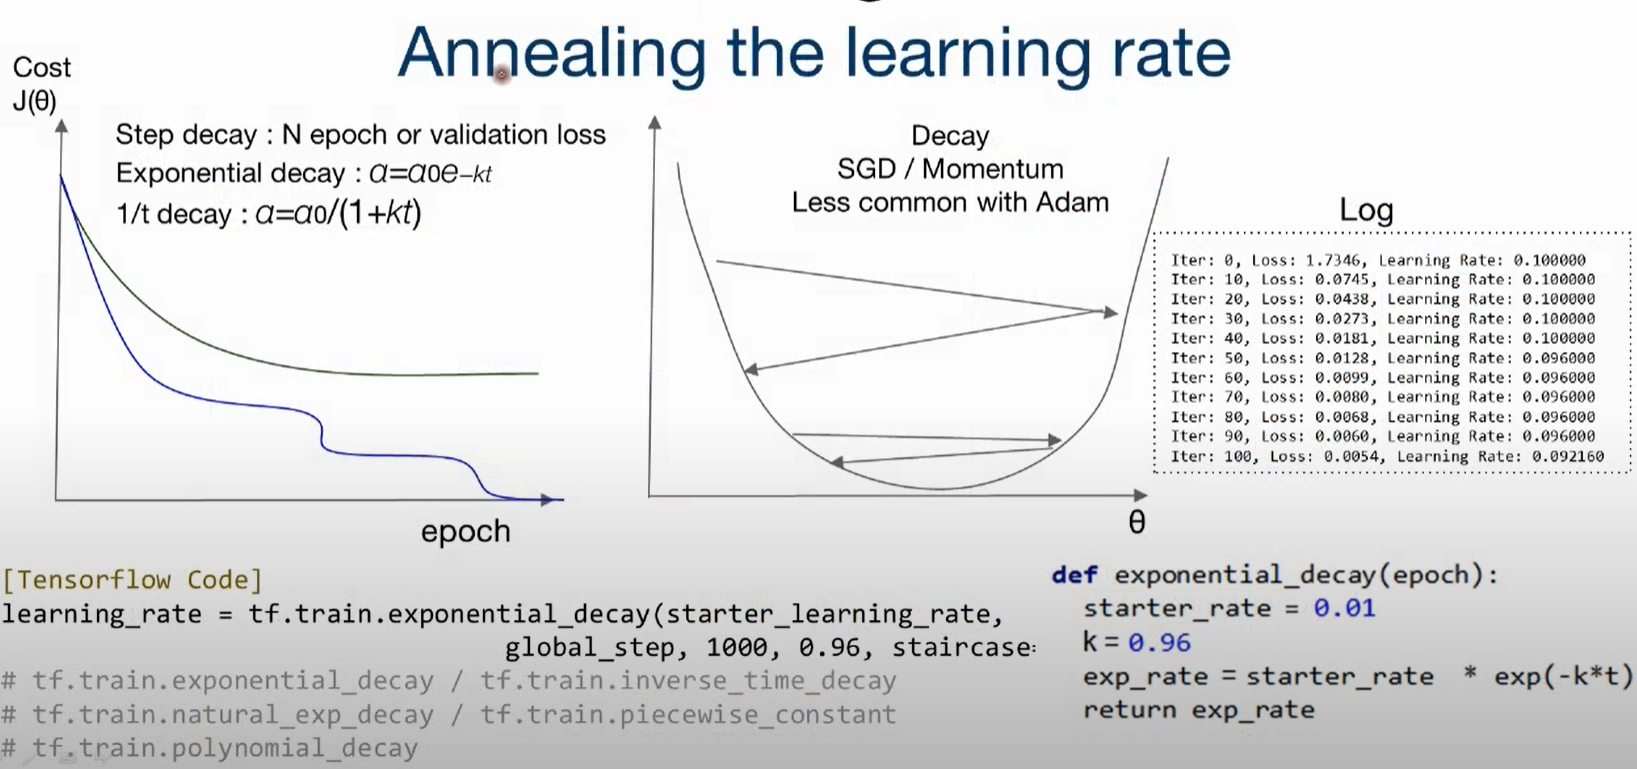

In [3]:
Image("Lab-07/2.png")

왼쪽의 그림과 같이 epoch에 따른 cost의 경향이 어느 단계에서 계단형태가 나타나는걸 볼 수 있다. 이것이 학습과정 중 learning rate를 조절하여 더 빠르게 cost를 minimum시키는 Learning rate Decay가 동작하는 모습이다. 이를 $\theta$와 cost 그래프로 본다면, 가운데 그림과 같이 학습 중 learning rate를 수정해 더 적은 획수로 minimum에 도달하는 것을 볼 수 있다.

이를 Tensorflow에서 제공하는 라이브러리 함수로 사용해도 되고, 하단 왼쪽과 같이 python 함수로 정의할 수 있다.

## Data preprocessing

주어진 입력 데이터의 분포가 너무 균일하지 않거나, learning rate를 적절하게 정했음에도 cost가 수렴하지 않고 발산하거나 이상한 동작을 보일 때는 Data preprocessing이 필요할 수 있다. 여러 preprocessing 방법 중 먼저 Feature Scaling에 대해 보자. Feature Scaling 기법은 크게 Standardization과 Normalization이 있다. 

$$
Standardization(Mean Distance) \quad x_{new} = \frac{x-\mu}{\sigma}\\
Normalization(0 \sim 1) \quad x_{new} = \frac{x-x_{min}}{x_{max}-x_{min}}$$

## Overfitting

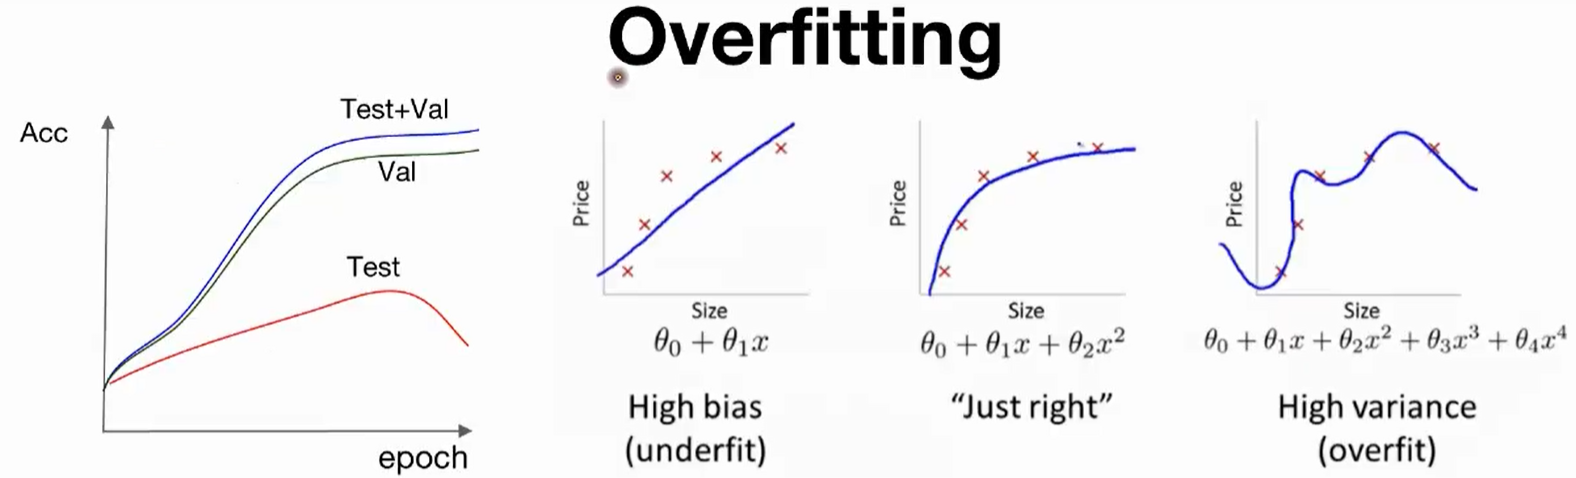

In [4]:
Image("Lab-07/3.png")

Overfitting은 ML이 갖는 가장 큰 문제로, 데이터를 학습하는 과정에서 데이터만 맞춰 fitting 된다는 의미이다. 학습 데이터와 다른 데이터로 테스트를 해보면 모델의 성능이 좋지 못한 문제가 발생할 수 있다.

좌측의 사진을 보면, 학습반복 횟수(epoch)와 정확도(Accuracy)에 대한 그래프이다. 학습이 반복될수록 모델의 평가(Validation)은 지속적으로 상승한다. 이때 학습은 주어진 데이터에 맞춰 학습되기 때문에 데이터에 맞게 모델이 만들어진다. 하지만 학습에 쓰이지 않은 새로운 데이터(Test)로 하게 되면 epoch가 늘수록 Acc는 줄어드는 경향을 보인다. 목표는 Test데이터와 Val데이터 모두 Acc를 높이는 것이다.

학습이 덜 이루어진 상태(Underfit)를 High bias, 즉 편향되어 있다. 그리고 학습 데이터에 너무 맞춰진 상태(Overfit)를 High variance, 변화량이 많은 상태를 말한다.

Overfitting을 해결하기 위한 대표적인 Solution으로 Regularization이 있다.

## Regularization

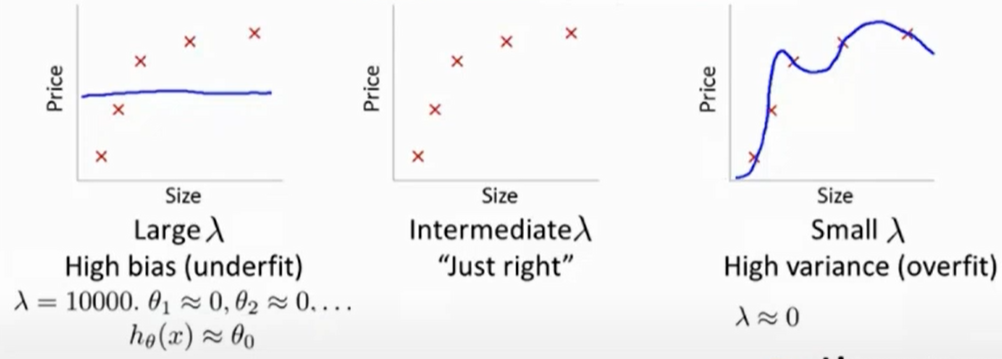

In [5]:
Image("Lab-07/4.png")

Regularization은 학습과정에서 특정한 term을 추가하여 loss을 줄이는 방법이다. Add term to loss.
위에서 알아본 Underfiting과 Overfiting 상황에서 $\lambda$값, term to loss 항을 추가한다
$$
**Linear\ regression\ with\ regularization**\\
Model:\ h_\theta(x)=\theta_0+\theta_{2}x^2+\theta_{3}x^3+\theta_{4}x^4\\
J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2+\frac{\lambda}{2m}\sum_{j=1}^{m}\theta_{j}^2$$

이때 $\lambda$를 regularization strength라고 부른다. 이 항을 추가해 더해줌으로써 $\theta$가 커지는 것에 대해 정규화(regularizaiton)해주는 효과를 가진다.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import tensorflow.contrib.eager as tfe

tf.compat.v1.enable_eager_execution()

print(tf.__version__)

1.14.0


* Data Normalization 정의.

In [7]:
# define Normalization to fit data scailing from 0 to 1

def normalization(data):
    numerator = data - np.min(data,0)
    denominator = np.max(data,0) - np.min(data,0)
    return numerator / denominator    

$$
Normalization(0 \sim 1) \quad x_{new} = \frac{x-x_{min}}{x_{max}-x_{min}}$$

* np.min or np.max(data, 0)\
data의 column vector의 최소최대값을 출력. 그러니까 위의 data(xy)에서 각 열의 최솟값을 출력하니, shape는 (1,4)이다.\
* np.min or np.max(data)\
data mat 전체 중 최소최대값 각 하나 값만을 출력
<p>
그러니까 위에 정의한 normalization은 각 column vector 내에서 수행된다.

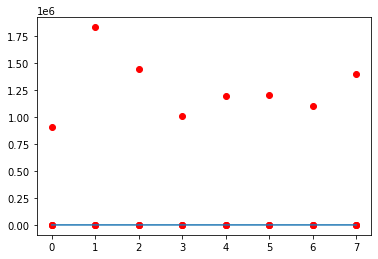

In [8]:
# Data

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

* Data Normalization 적용 및 실행

[[8.28659973e+02 8.33450012e+02 9.08100000e+05 8.28349976e+02
  8.31659973e+02]
 [8.23020020e+02 8.28070007e+02 1.82810000e+06 8.21655029e+02
  8.28070007e+02]
 [8.19929993e+02 8.24400024e+02 1.43810000e+06 8.18979980e+02
  8.24159973e+02]
 [8.16000000e+02 8.20958984e+02 1.00810000e+06 8.15489990e+02
  8.19239990e+02]
 [8.19359985e+02 8.23000000e+02 1.18810000e+06 8.18469971e+02
  8.18979980e+02]
 [8.19000000e+02 8.23000000e+02 1.19810000e+06 8.16000000e+02
  8.20450012e+02]
 [8.11700012e+02 8.15250000e+02 1.09810000e+06 8.09780029e+02
  8.13669983e+02]
 [8.09510010e+02 8.16659973e+02 1.39810000e+06 8.04539978e+02
  8.09559998e+02]]
[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.1143606

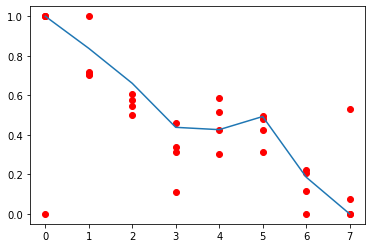

In [9]:
print(xy)
xy = normalization(xy)
print(xy)

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

* 학습에 사용될 dataset을 만들어 준다.

In [10]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
print(dataset)

<DatasetV1Adapter shapes: ((?, 4), (?, 1)), types: (tf.float64, tf.float64)>


* Weight와 Bias의 inialize. 정규분포로 정의\
x_train의 shape가 (8,4)이고 y_train은 (4,1)이므로 다음과 같이 선언

In [11]:
W = tf.Variable(tf.random.normal([4, 1]), dtype=tf.float32)
b = tf.Variable(tf.random.normal([1]), dtype=tf.float32)

* Linear Regression의 Hypothesis 정의

In [12]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

* Data Regularization을 고려한 l2_loss 함수 정의

In [13]:
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

$$
J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})^2+\frac{\lambda}{2m}\sum_{j=1}^{m}\theta_{j}^2$$

* Cost func을 정의

In [14]:
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

* 학습을 위한 Hyper parameter에 대한 정의

In [15]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):
    global_step = tf.Variable(0, trainable=False)
    learning_rate = tf.compat.v1.train.exponential_decay(starter_learning_rate, global_step, 50, 0.96, staircase=True)
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
else:
    optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

In [16]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in tfe.Iterator(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]), global_step=global_step)
        if step % 10 == 0:
            print("Iter: {}, Loss: {:.4f}, Learning Rate: {:.8f}".format(step, loss_value, optimizer._learning_rate()))

Iter: 0, Loss: 9.1060, Learning Rate: 0.10000000
Iter: 10, Loss: 0.1270, Learning Rate: 0.10000000
Iter: 20, Loss: 0.0778, Learning Rate: 0.10000000
Iter: 30, Loss: 0.0500, Learning Rate: 0.10000000
Iter: 40, Loss: 0.0335, Learning Rate: 0.10000000
Iter: 50, Loss: 0.0235, Learning Rate: 0.09600000
Iter: 60, Loss: 0.0173, Learning Rate: 0.09600000
Iter: 70, Loss: 0.0132, Learning Rate: 0.09600000
Iter: 80, Loss: 0.0104, Learning Rate: 0.09600000
Iter: 90, Loss: 0.0084, Learning Rate: 0.09600000
Iter: 100, Loss: 0.0070, Learning Rate: 0.09216000
